## Reinforcement Learning Tarea 1 - K Armed Bandits

### Objetivos:
Demostrar entendimiento sobre K-Armed Bandits, implementar varios algoritmos vistos en el curso teórico y comparar su performance en un mismo problema (ambiente).

### A entregar:
- Implementación de agente arbitrario.
- Implementación de agente epsilon-greedy.
- Implementación de agente epsilon-greedy optimista.
- Implementación de agente upper confidence bound.
- Grafique la evolución de las recompensas (reward) a lo largo del tiempo para cada algoritmo, promediado sobre 2000 ejecuciones.
- Escriba un reporte sobre sus implementaciones comparando los distintos agentes implementados.

### Instalación y carga de ambiente

`git clone https://github.com/JKCooper2/gym-bandits.git`

`cd gym-bandits`

`pip install .`

In [ ]:
# Para usarlo desde Google Colab
!git clone https://github.com/JKCooper2/gym-bandits.git
!cd gym-bandits
!pip install gym-bandits/

## Descripción del ambiente a usar

Vamos a usar GymBandits, una libreria diseñada para ser utilizada sobre OpenAi Gym (https://gym.openai.com/) pero orientada a Armed Bandits. 

Recordando el teórico, sabemos que un K Armed Bandit representa una maquina tragamonedas con multiples brazos (K) y donde nuestra recompensa depende de cual brazo tiremos.

En este caso particular, `BanditTenArmedGaussian` es el ambiente a utilizar (página 30 del libro de Sutton y Barto), cuenta con 10 brazos (K=10) y por cada interaccion con el ambiente (`step`) nustra recompensa (reward) depende de que brazo elegimos entre los 10 posibles. En este ambiente, todos los brazos tienen una recompensa (que puede ser negativa en algunos casos) y nuestro objetivo es diseñar agentes que maximicen la suma total de recompensas a lo largo de 1000 interacciones con el ambiente (`1000 steps`).

## Definicion del ambiente e imports necesarios

In [1]:
import gym
import random
import gym_bandits
import numpy as np
import matplotlib.pyplot as plt

def get_env():
    return gym.make("BanditTenArmedGaussian-v0")

BanditTenArmedGaussian-v0: 10 armed bandit mentioned on Reinforcement Learning: An Introduction (Sutton and Barto)

In [2]:
sample_env = get_env()
sample_env.action_space

Discrete(10)

In [3]:
number_steps = 1000

In [4]:
from Agent import Agent

El método reset es necesario en ambientes de Gym para inicializar o reinicializar el estado del ambiente antes de comenzar una nueva simulación.

In [6]:
sample_env.reset()

0

### Implementación de agente arbitrario

In [8]:
class RandomAgent(Agent):
    def __init__(self, name):
        super().__init__(name)        

    def reset_internal_state(self):
        pass

    def select_action(self, game_state):
        return self.environment.action_space.sample()
   
    def update_internal_state(self, observation, action, reward):
        pass
    
    def get_extra_info(self):
        return None

# Example run
random_agent = RandomAgent("RandomAgent")

logs, info = random_agent.play(n_steps = 1000, environment =sample_env)

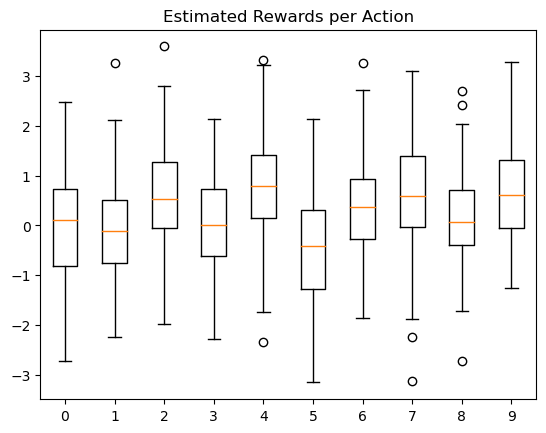

In [9]:
data = list(map(lambda x: np.array(x), logs['actions_rewards'].values()))
labels = list(logs['actions_rewards'].keys())
fig1, ax1 = plt.subplots()
ax1.set_title('Estimated Rewards per Action')
a = ax1.boxplot(data, labels = labels)

In [10]:
print (f"Accumulated reward: {sum(logs['rewards']):.2f}")
print (f"Mean reward: {logs['rewards'].mean():.2f}")

Accumulated reward: 257.64
Mean reward: 0.26


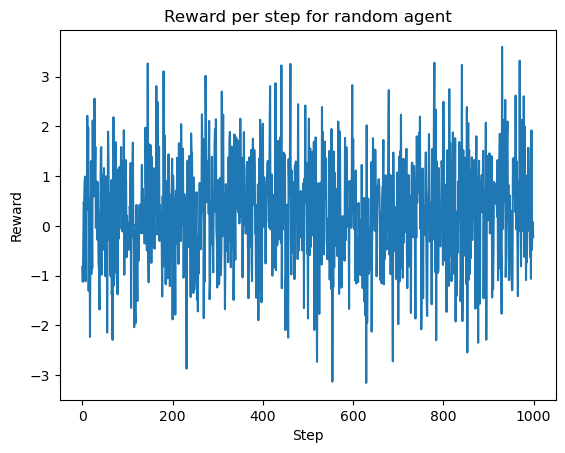

In [11]:
# Example plot
plt.plot(range(number_steps), logs['rewards'])
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Reward per step for random agent")
plt.show()

### Implementación de agente epsilon-greedy

In [14]:
class EpsilonGreedyAgent(Agent):
    def __init__(self, name, epsilon):
        super().__init__(name)
        self.epsilon = epsilon

    def reset_internal_state(self):
        self.q = np.zeros(self.environment.action_space.n)
        self.n = np.zeros(self.environment.action_space.n)

    def select_action(self, game_state):
        if random.random() < self.epsilon:
            return self.environment.action_space.sample()
        return np.argmax(self.q)
   
    def update_internal_state(self, observation, action, reward):
        self.n[action] = self.n[action] + 1
        self.q[action] = self.q[action] + (1/self.n[action]) * (reward - self.q[action])
    
    def get_extra_info(self):
        return { "q_a": self.q, "n_a": self.n}

# Example run
epsilon_greedy_agent = EpsilonGreedyAgent("EpsilonGreedyAgent", 0.3)

logs, info = epsilon_greedy_agent.play(n_steps = 1000, environment =sample_env)
print(info['n_a'])
print(info['q_a'])
print (f"Accumulated reward: {sum(logs['rewards']):.2f}")
print (f"Mean reward: {logs['rewards'].mean():.2f}")

[ 37.  36.  38.  32. 509.  36.  26. 211.  28.  47.]
[-0.05228549 -0.05230077  0.27058816  0.43959891  0.95894101 -0.85180191
  0.64458473  0.75409755  0.33174589  0.57402322]
Accumulated reward: 690.11
Mean reward: 0.69


### Implementación de agente epsilon-greedy optimista

In [18]:
class OptimisticEpsilonGreedyAgent(Agent):
    def __init__(self, name, epsilon, q_1):
        super().__init__(name)
        self.epsilon = epsilon
        self.q_1 = q_1

    def reset_internal_state(self):
        self.q = np.zeros(self.environment.action_space.n) + self.q_1
        self.n = np.zeros(self.environment.action_space.n)

    def select_action(self, game_state):
        if random.random() < self.epsilon:
            return self.environment.action_space.sample()
        return np.argmax(self.q)
   
    def update_internal_state(self, observation, action, reward):
        self.n[action] = self.n[action] + 1
        self.q[action] = self.q[action] + (1/self.n[action]) * (reward - self.q[action])
    
    def get_extra_info(self):
        return { "q_a": self.q, "n_a": self.n}

# Example run
optimistic_epsilon_greedy_agent = OptimisticEpsilonGreedyAgent("OptimisticEpsilonGreedyAgent", 0.3, q_1 = 10)

logs, info = optimistic_epsilon_greedy_agent.play(n_steps = 1000, environment =sample_env)
print(info['n_a'])
print(info['q_a'])
print (f"Accumulated reward: {sum(logs['rewards']):.2f}")
print (f"Mean reward: {logs['rewards'].mean():.2f}")

[ 35.  34.  33.  34. 685.  27.  35.  35.  38.  44.]
[ 0.04089583  0.09930392  0.21049702  0.23939426  0.91829244 -0.39591081
  0.54667551  0.63827768  0.44370385  0.70922131]
Accumulated reward: 727.77
Mean reward: 0.73


### Implementación de agente upper confidence bound

In [19]:
class UCBAgent(Agent):
    def __init__(self, name, C):
        super().__init__(name)
        self.C = C
        self.t = 0

    def reset_internal_state(self):
        self.q = np.zeros(self.environment.action_space.n)
        # init todos en 1, ya que habría division por 0 en select_action la primera vez
        self.n = np.zeros(self.environment.action_space.n) + 1

    def select_action(self, game_state):
        self.t += 1
        step_count = np.sum(self.n)
        return np.argmax(self.q + self.C*(np.sqrt(np.log(step_count)/self.n)))

    def update_internal_state(self, observation, action, reward):
        self.n[action] = self.n[action] + 1
        self.q[action] = self.q[action] + (1/self.n[action]) * (reward - self.q[action])

    def get_extra_info(self):
        return { "q_a": self.q, "n_a": self.n}

# Example run
UCB_agent = UCBAgent("UCBAgent", 1)

logs, info = UCB_agent.play(n_steps = 1000, environment =sample_env)
print(info['n_a'])
print(info['q_a'])
print (f"Accumulated reward: {sum(logs['rewards']):.2f}")
print (f"Mean reward: {logs['rewards'].mean():.2f}")

[  4.   6.   8.   8. 894.   4.  25.  20.  15.  26.]
[-0.91899571 -0.14789107 -0.15959327 -0.1439573   0.85973859 -0.41268798
  0.38724245  0.30961568  0.22590749  0.39039476]
Accumulated reward: 789.38
Mean reward: 0.79


### Reporte

In [20]:
def calculate_mean_rewards_and_selected_optimal_action_by_step(n_runs, n_steps, agent_constructor, param):
    many_rewards = []
    many_selected_best_action = []
    for i in range(n_runs):
        env = get_env()
        agent = agent_constructor(param)
        logs, info = agent.play(n_steps, env)
        many_rewards.append(logs['rewards'])
        many_selected_best_action.append(logs['selected_best_action'])
    mean_rewards = np.mean(many_rewards, axis = 0)
    mean_selected_best_action = np.mean(many_selected_best_action, axis = 0)    
    return {"mean_rewards": mean_rewards, "mean_selected_best_action":mean_selected_best_action}

In [38]:
from functools import partial 

parameters_eps_greedy = [0, 0.1, 0.01]

#Para epsilon greedy optimista con tasa de actualización no fija con que Q0 esté sobre la media basta (default 10 = OK)
parameters_eps_greedy_opt = [0, 0.1, 0.01]


parameters_ucb = [0.25, 0.5, 1, 2, 4, 10]

n_runs = 2000
n_steps = 1000

eps_greedy_results = list(map(lambda x: (x,calculate_mean_rewards_and_selected_optimal_action_by_step(n_runs, n_steps, partial(EpsilonGreedyAgent, "EpsilonGreedyAgent"),x)), parameters_eps_greedy))

eps_greedy_opt_results = list(map(lambda x: (x,calculate_mean_rewards_and_selected_optimal_action_by_step(n_runs, n_steps, partial(OptimisticEpsilonGreedyAgent, "EpsilonGreedyAgent", q_1 = 10)  ,x)), parameters_eps_greedy_opt))

ucb_results = list(map(lambda x: (x,calculate_mean_rewards_and_selected_optimal_action_by_step(n_runs, n_steps, partial(UCBAgent, "UCBAgent"),x)), parameters_ucb))

/home/k/miniconda3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/k/miniconda3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/k/miniconda3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
/home/k/miniconda3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is writt

In [22]:
def plot_results(results, param_name, metric, plot_title, x_label, y_label, n_steps):
    plt.figure(figsize=(10,5))
    for param, means in results:
        plt.plot(range(n_steps), means[metric], label=param_name+' = '+str(param))        
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.legend()
    plt.show()

#### Epsilon Greedy:

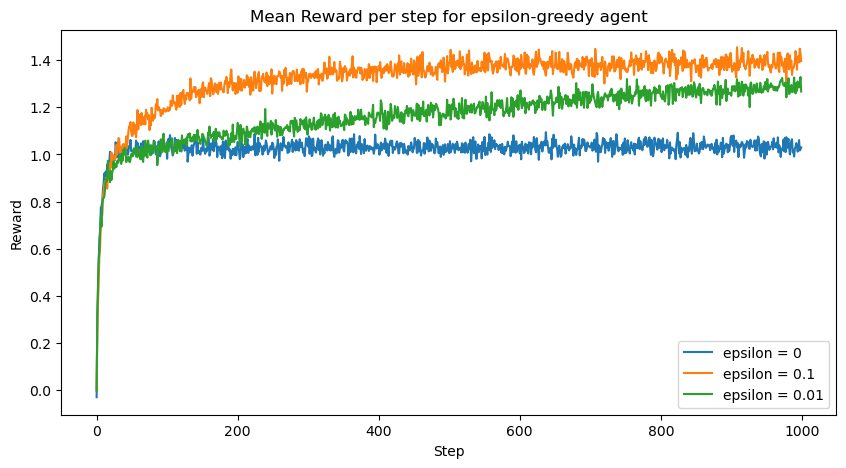

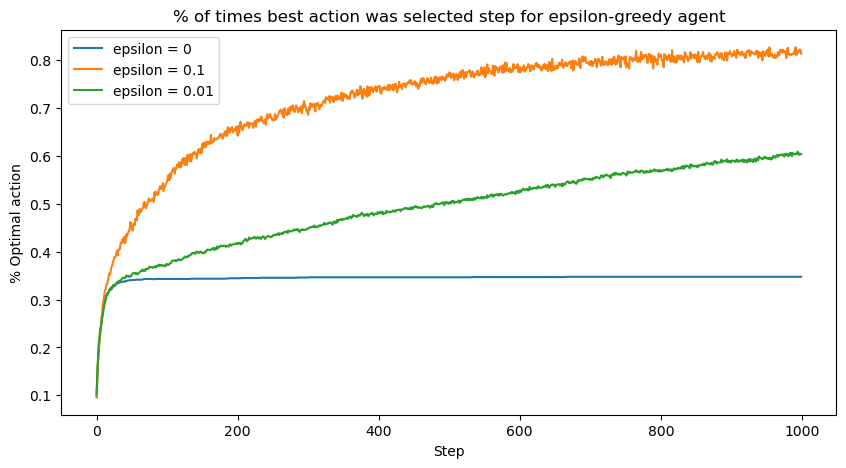

In [23]:
plot_results(eps_greedy_results, "epsilon","mean_rewards","Mean Reward per step for epsilon-greedy agent","Step","Reward", n_steps)
plot_results(eps_greedy_results, "epsilon","mean_selected_best_action","% of times best action was selected step for epsilon-greedy agent","Step","% Optimal action", n_steps)


#### Reward
Epsilon = 0 (estrategia totalmente avara): Al principio, la gráfica podría crecer rápidamente ya que el agente selecciona las acciones basándose en las estimaciones iniciales de las recompensas. Sin embargo, dado que no hay exploración, el agente se queda con la acción que cree que tiene la mayor recompensa. Si esa acción no es realmente la mejor, la curva se estancará, ya que el agente no explora otras opciones para mejorar su conocimiento de las recompensas. Este estancamiento se debe a la falta de exploración.

Epsilon = 0.01: En este caso, la gráfica también crecerá al principio pero a un ritmo ligeramente más lento que el caso de epsilon = 0.1. La razón es que el agente está explorando con menos frecuencia (solo el 1% del tiempo). Aunque la exploración es menor, todavía puede permitir al agente encontrar acciones óptimas eventualmente.

Epsilon = 0.1: La gráfica para este caso también crecerá rápidamente al principio, pero a diferencia de la estrategia totalmente avara, el agente explorará otras acciones con una probabilidad del 10%. Esto permite al agente aprender más sobre el entorno y, con el tiempo, encontrar acciones con recompensas más altas. La tasa de crecimiento de la gráfica podría disminuir un poco debido a la exploración, pero en general, la recompensa promedio será más alta que en el caso de la estrategia totalmente avara, ya que el agente puede encontrar y explotar acciones óptimas.

#### Optimal action
Epsilon = 0 (estrategia totalmente avara): Al principio, el porcentaje de acciones óptimas seleccionadas puede ser bajo debido a la falta de conocimiento del agente sobre las recompensas. Con el tiempo, si el agente selecciona la acción óptima por casualidad, seguirá eligiendo esa acción, y el porcentaje de acciones óptimas seleccionadas podría aumentar. Sin embargo, si el agente se queda con una acción subóptima, el porcentaje de acciones óptimas seleccionadas será bajo y se estancará, ya que no hay exploración.

Epsilon = 0.01: Con solo un 1% de probabilidad de exploración, el agente explorará menos que en el caso epsilon = 0.1. Sin embargo, aún puede descubrir la acción óptima con el tiempo. El porcentaje de acciones óptimas seleccionadas podría ser similar al caso epsilon = 0.1, pero el agente tardará más tiempo en explorar y aprender.

Epsilon = 0.1: Con un 10% de probabilidad de exploración, el agente tiene más oportunidades de descubrir la acción óptima. Al principio, el porcentaje de acciones óptimas seleccionadas podría ser bajo, pero aumentará con el tiempo a medida que el agente explore y aprenda. A largo plazo, el porcentaje de acciones óptimas seleccionadas será más alto que en el caso totalmente avaro (epsilon = 0), pero nunca alcanzará el 100%, ya que el agente seguirá explorando ocasionalmente acciones no óptimas.

#### Conclusión
Hay que tener en cuenta que el epsilon actua como una cota superior, es decir, epsilon=0,01 nunca va a superar el 0.99% ni epsilon=0,10 nunca va a superar el 0.90%. Todo se reduce a un balance en que tan rapido quiero llega a un "buen" resultado y como yo defino que es un "buen" resultado.



#### Epsilon Greedy Optimista:

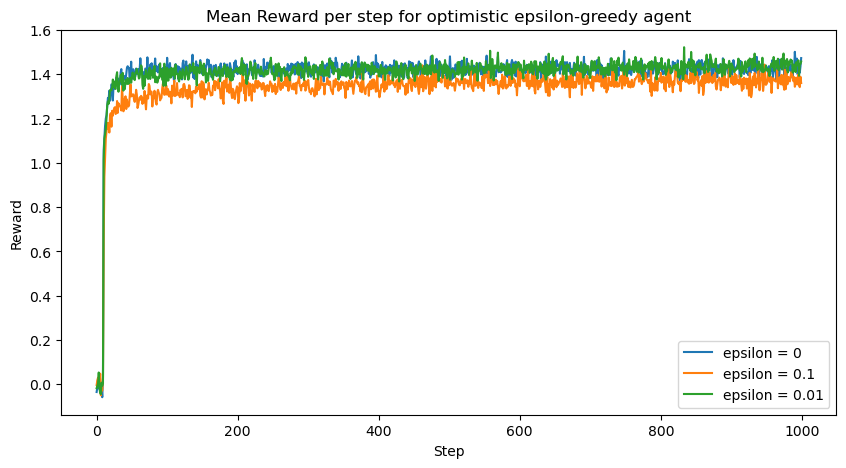

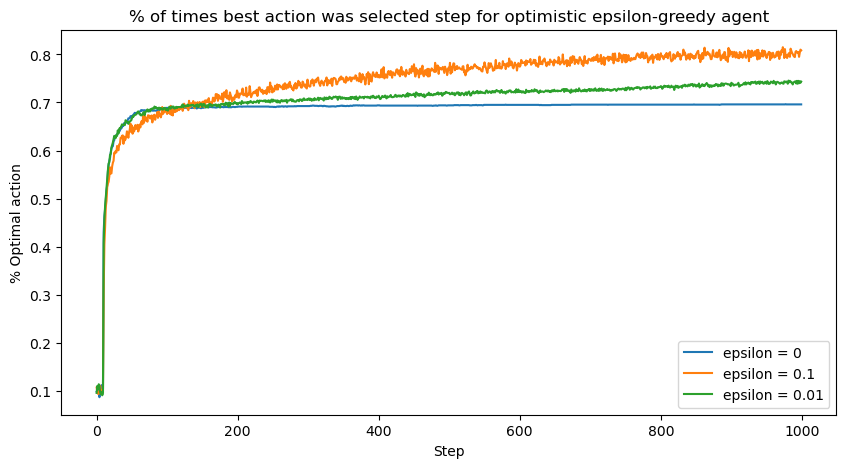

In [29]:
plot_results(eps_greedy_opt_results, "epsilon","mean_rewards","Mean Reward per step for optimistic epsilon-greedy agent","Step","Reward", n_steps)
plot_results(eps_greedy_opt_results, "epsilon","mean_selected_best_action","% of times best action was selected step for optimistic epsilon-greedy agent","Step","% Optimal action", n_steps)

#### Mean reward
Al utilizar el enfoque epsilon-greedy optimista, el agente comienza con estimaciones de recompensas muy optimistas, lo que provoca un alto grado de exploración al principio del proceso de aprendizaje. Esto se refleja en la gráfica como un crecimiento inicial rápido en la recompensa promedio.

A medida que el agente realiza acciones y recibe retroalimentación del entorno en forma de recompensas, las estimaciones de las recompensas se actualizan y convergen gradualmente hacia sus verdaderos valores. Esto se traduce en un cambio en la tasa de crecimiento de la gráfica de recompensa promedio, que se vuelve más estable a medida que el agente aprende más sobre el entorno y se ajusta sus estimaciones de recompensa.

Comparada con la gráfica de recompensa promedio utilizando solo la estrategia epsilon-greedy, la gráfica con el enfoque epsilon-greedy optimista mostraría un mayor crecimiento inicial y una tasa de aprendizaje más rápida, ya que el agente explora más activamente diferentes acciones debido a las estimaciones iniciales optimistas.

#### Optimal action
El agente comienza con estimaciones de recompensas muy optimistas, lo que provoca un alto grado de exploración al principio del proceso de aprendizaje. En esta fase inicial, el porcentaje de acciones óptimas seleccionadas podría ser bajo, ya que el agente está explorando muchas acciones para ajustar sus estimaciones de recompensa.

A medida que el agente realiza acciones y actualiza sus estimaciones de recompensa, aprenderá más sobre el entorno y comenzará a seleccionar la acción óptima con más frecuencia. Esto se traduce en un aumento en el porcentaje de acciones óptimas seleccionadas en la gráfica.

En comparación con la gráfica del "% optimal action" utilizando solo la estrategia epsilon-greedy, la gráfica con el enfoque epsilon-greedy optimista mostraría un aumento más rápido en el porcentaje de acciones óptimas seleccionadas. Esto se debe a que el optimismo inicial fomenta la exploración, permitiendo al agente aprender más rápidamente sobre las recompensas asociadas con diferentes acciones y mejorar su capacidad para identificar y seleccionar la acción óptima.

#### Conclusion

Establecer valores iniciales altos fomenta la exploración, ya que las recompensas iniciales son menores y el agente cambia a otras acciones. Esto permite que todas las acciones se prueben varias veces antes de que las estimaciones de valor converjan.

#### UCB

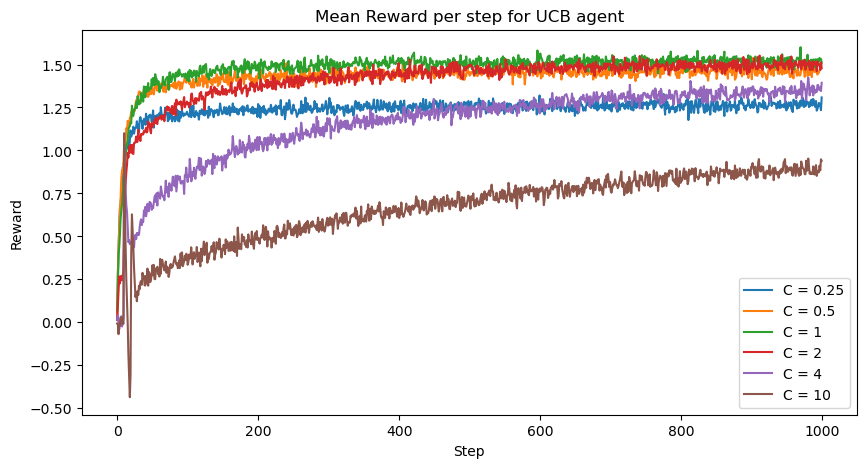

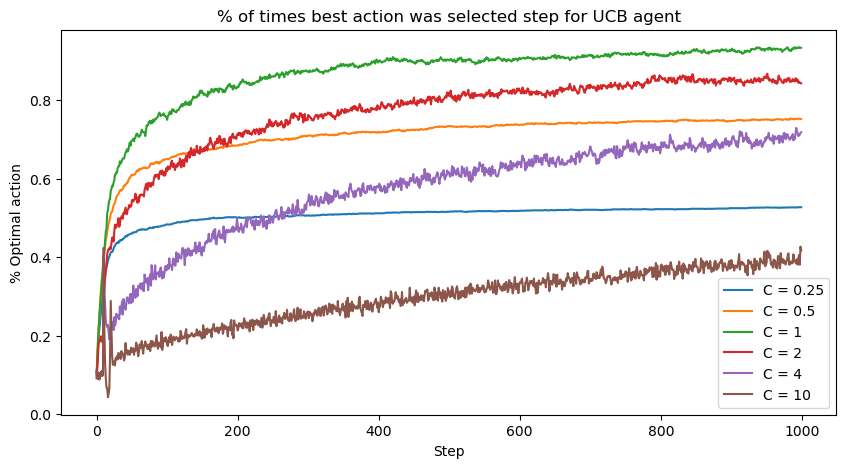

In [39]:
plot_results(ucb_results, "C","mean_rewards","Mean Reward per step for UCB agent","Step","Reward", n_steps)
plot_results(ucb_results, "C","mean_selected_best_action","% of times best action was selected step for UCB agent","Step","% Optimal action", n_steps)

#### Reward
En general, se espera que para valores pequeños de C, el algoritmo tienda a explotar más los brazos que parecen ser más prometedores en el corto plazo, pero que pueda quedarse atascado en ellos sin explorar suficientemente los demás brazos, lo que puede llevar a un desempeño subóptimo a largo plazo. Por otro lado, para valores grandes de C, se espera que el algoritmo tenga una exploración más amplia y, por lo tanto, sea más probable que encuentre los mejores brazos a largo plazo, pero a costa de tener un desempeño inicial más bajo mientras explora.

Si C es demasiado pequeño (por ejemplo, 0.25), el algoritmo tenderá a explotar demasiado pronto y puede quedarse atascado en acciones subóptimas, lo que dará lugar a una recompensa promedio más baja a lo largo del tiempo.

Si C es moderadamente pequeño (por ejemplo, 0.5 o 1), el algoritmo puede equilibrar mejor la exploración y la explotación, lo que puede resultar en una recompensa promedio más alta en comparación con un valor de C más pequeño.

Si C es más grande (por ejemplo, 2, 4 o 10), el algoritmo explorará más ampliamente antes de explotar. Sin embargo, si C es demasiado grande, se puede perder tiempo explorando acciones que claramente son subóptimas, lo que reduce la recompensa promedio.

#### Optimal action
Si C es demasiado pequeño (por ejemplo, 0.25), el algoritmo se inclinará hacia la explotación prematura y podría no seleccionar la acción óptima con la frecuencia suficiente. En este caso, el % optimal action será más bajo.

Si C tiene un valor moderado (por ejemplo, 0.5 o 1), el algoritmo podrá equilibrar mejor la exploración y la explotación, lo que podría aumentar la frecuencia con la que selecciona la acción óptima. En este caso, el % optimal action será más alto en comparación con un valor de C más pequeño.

Si C es más grande (por ejemplo,  2, 4 o 10), el algoritmo explorará más antes de explotar, lo que podría llevar a encontrar la acción óptima con más frecuencia. Sin embargo, si C es demasiado grande, el algoritmo podría pasar demasiado tiempo explorando acciones claramente subóptimas y, como resultado, el % optimal action podría disminuir

#### A continuación compararemos los que mejor resultado dan en una misma gráfica

In [35]:
eps_greedy_results_means = list(map(lambda x: (x[0], x[1],np.mean(x[1]['mean_rewards'])), eps_greedy_results))
eps_greedy_opt_results_means = list(map(lambda x: (x[0], x[1],np.mean(x[1]['mean_rewards'])), eps_greedy_opt_results))
ucb_results_means  = list(map(lambda x: (x[0], x[1],np.mean(x[1]['mean_rewards'])), ucb_results))

In [36]:
best_eps_greedy = max(eps_greedy_results_means,key=lambda item:item[2])
best_eps_greedy_opt = max(eps_greedy_opt_results_means,key=lambda item:item[2])
best_ucb = max(ucb_results_means,key=lambda item:item[2])

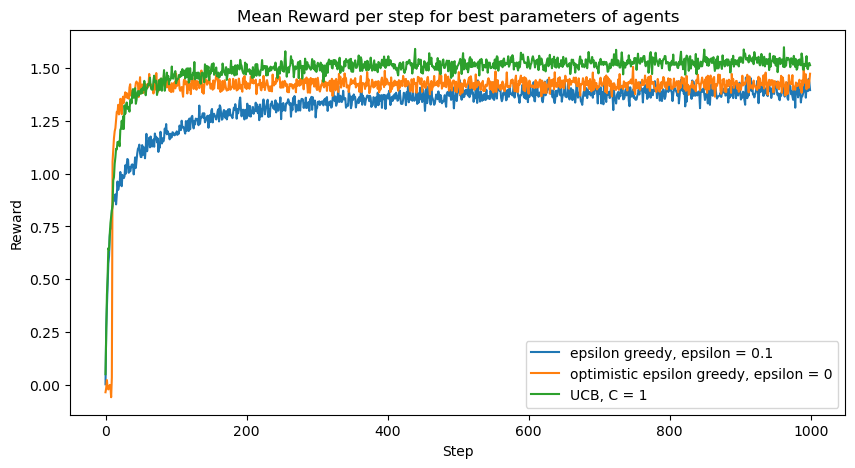

In [37]:
plt.figure(figsize=(10,5))    
plt.plot(range(n_steps), best_eps_greedy[1]['mean_rewards'], label='epsilon greedy, epsilon = '+str(best_eps_greedy[0]))
plt.plot(range(n_steps), best_eps_greedy_opt[1]['mean_rewards'], label='optimistic epsilon greedy, epsilon = '+str(best_eps_greedy_opt[0]))
plt.plot(range(n_steps), best_ucb[1]['mean_rewards'], label='UCB, C = '+str(best_ucb[0]))
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Mean Reward per step for best parameters of agents")
plt.legend()
plt.show()

#### Epsilon Greedy
Convergencia moderada hacia la recompensa promedio óptima y rendimiento general limitado debido a la exploración aleatoria.
#### Epsilon Greedy Optimista
Convergencia más rápida hacia la recompensa promedio óptima en comparación con Epsilon Greedy, pero aún puede verse afectado por la exploración aleatoria.
#### Upper Confidence Bound (UCB)
Convergencia potencialmente más rápida hacia la recompensa promedio óptima y mejor rendimiento general debido a una exploración más eficiente y dirigida.